In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

column = ['len(m)', 'Wb(m)', 'Door', 'W(100kg)', 'Seat', 'E_S(1000cc)', 'S_F', 'Price']
df = pd.read_csv('cars_dl5.csv', names=column)
df.head(300)

,len(m),Wb(m),Door,W(100kg),Seat,E_S(1000cc),S_F,Price
0,4.643,1.973,2,10.60,2,3.9,1,Expensive
1,4.672,1.932,2,10.76,2,4.0,1,Expensive
2,4.331,1.958,2,9.00,2,4.1,1,Expensive
3,4.656,1.835,2,8.49,2,3.9,1,Expensive
4,4.621,1.942,2,10.48,2,3.9,1,Expensive
...,...,...,...,...,...,...,...,...
214,4.079,1.546,5,15.34,8,2.0,0,Cheap
215,4.061,1.706,5,13.84,8,1.6,0,Cheap
216,4.094,1.557,5,14.32,8,1.9,0,Cheap
217,3.657,1.421,5,15.52,8,2.4,0,Cheap


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   len(m)       219 non-null    float64
 1   Wb(m)        219 non-null    float64
 2   Door         219 non-null    int64  
 3   W(100kg)     219 non-null    float64
 4   Seat         219 non-null    int64  
 5   E_S(1000cc)  219 non-null    float64
 6   S_F          219 non-null    int64  
 7   Price        219 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 13.8+ KB


In [3]:
missing_values = df.isna().sum()
print(missing_values)

len(m)         0
Wb(m)          0
Door           0
W(100kg)       0
Seat           0
E_S(1000cc)    0
S_F            0
Price          0
dtype: int64


In [4]:
count_of_cars = len(df[df['Price']=='Moderate'])
print(count_of_cars)

85


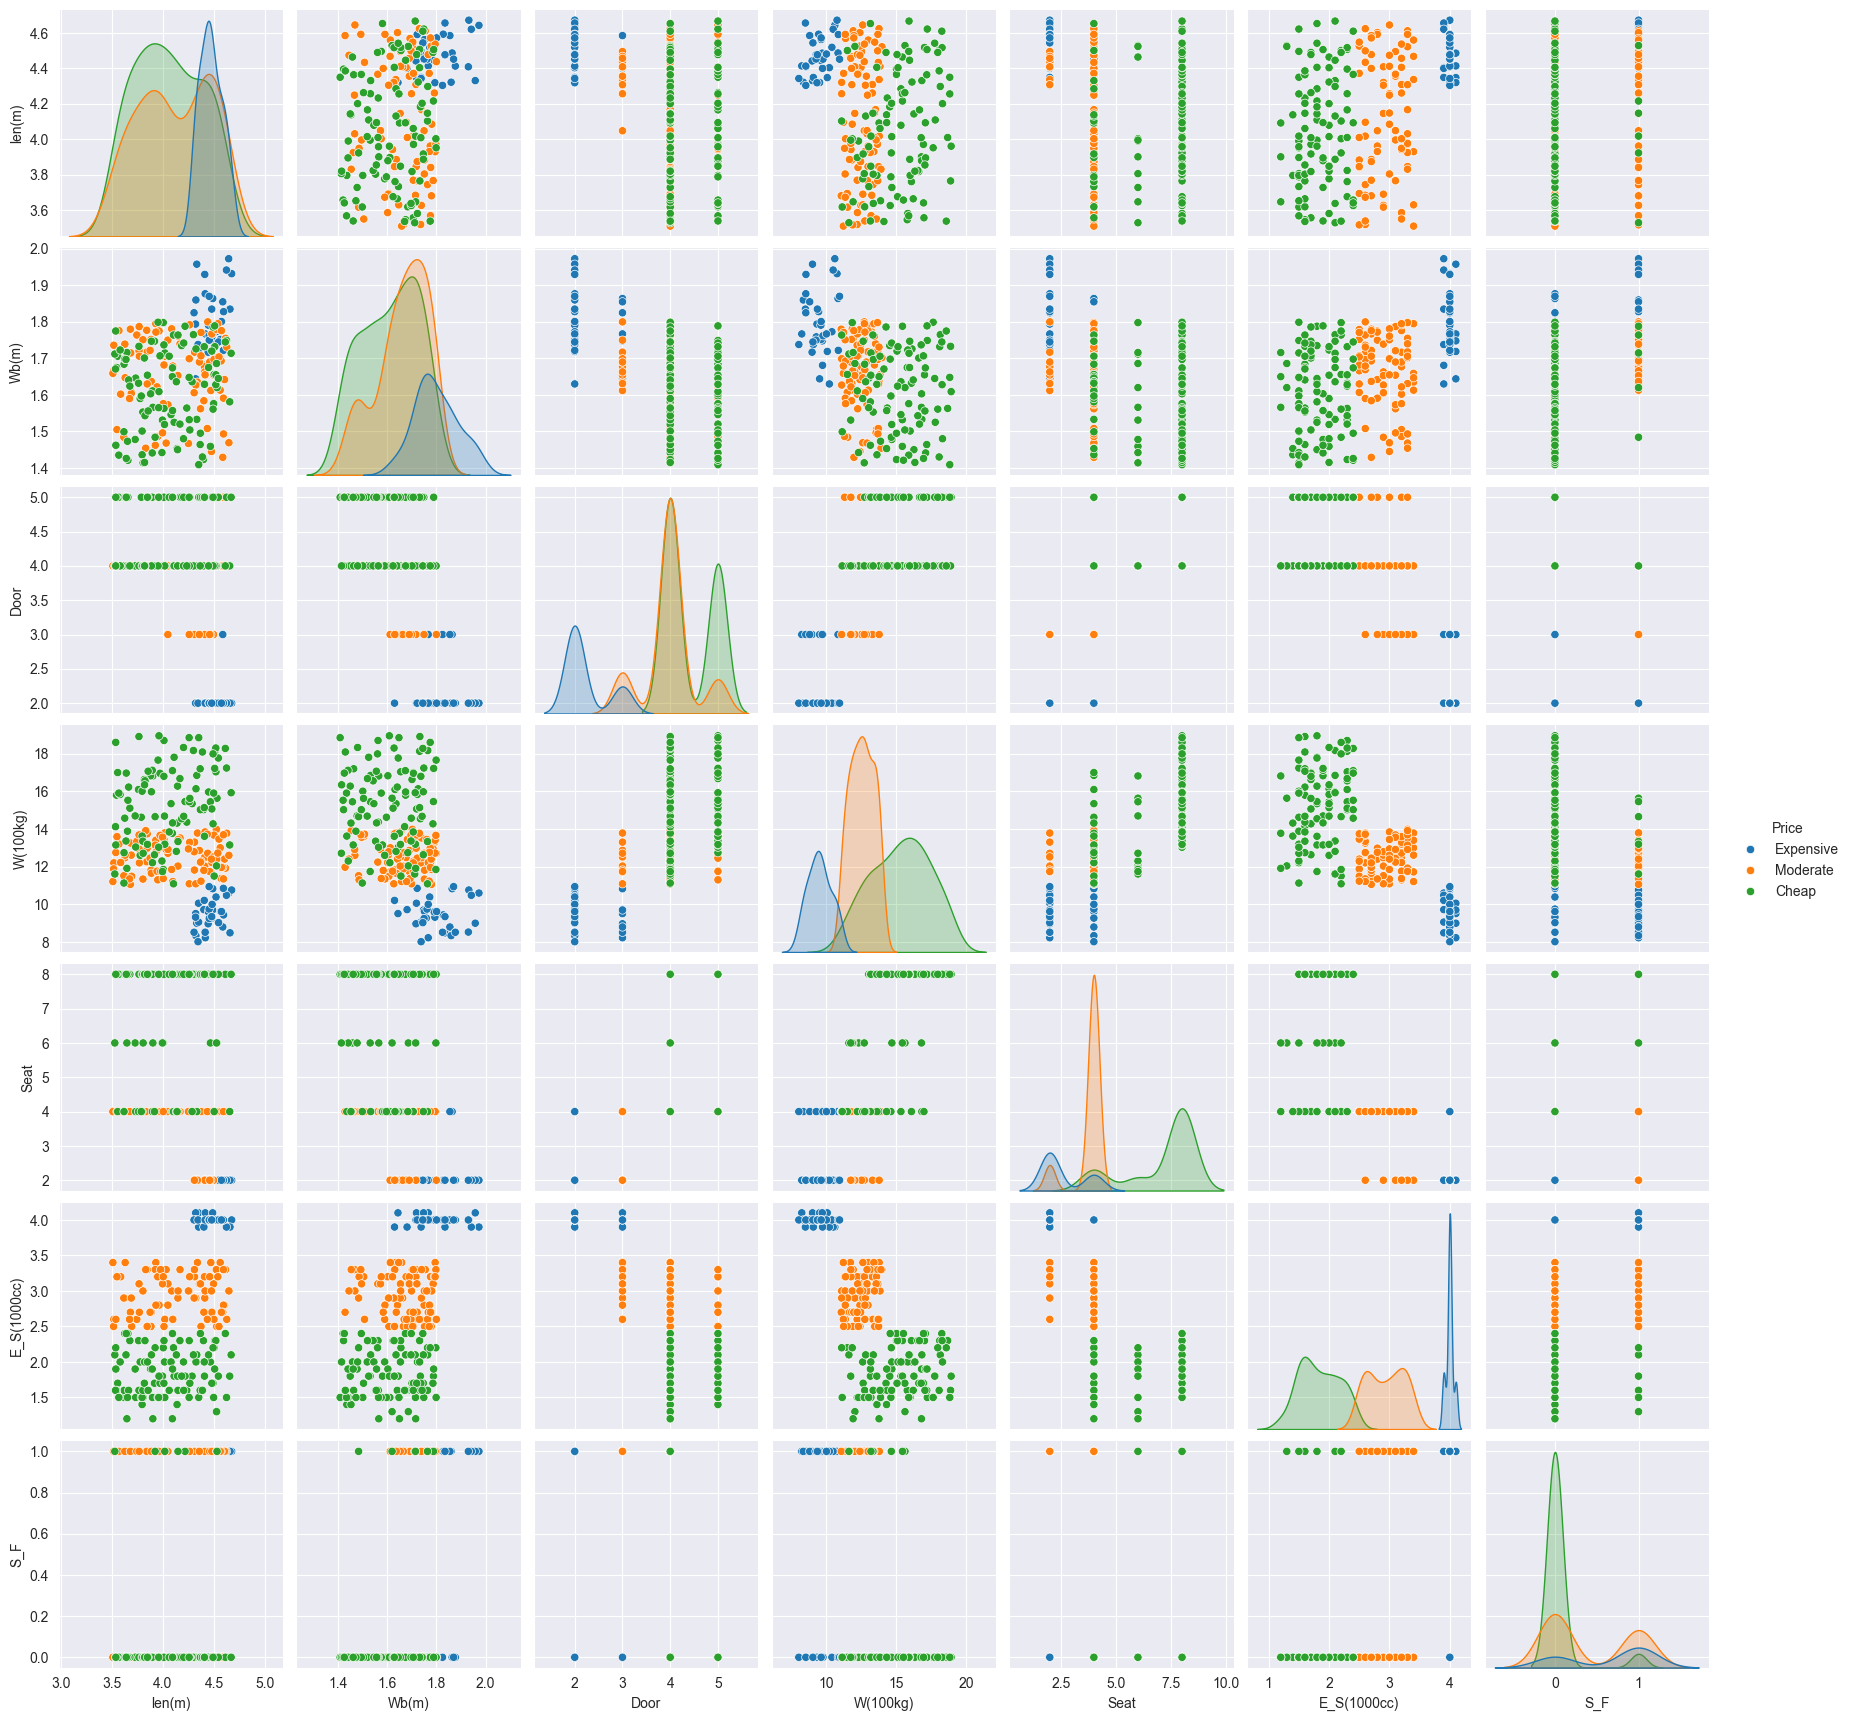

In [5]:
sns.pairplot(df, hue='Price')

In [6]:
data = df.values
X = data[:,0:7]
Y = data[:,7]
Y_data = np.array([np.average(X[:,i][Y==j].astype('float32')) for i in range(X.shape[1]) for j in (np.unique(Y))])
Y_data_reshaped = Y_data.reshape(7,3)
Y_data_reshaped = np.swapaxes(Y_data_reshaped,0,1)
X_axis = np.arange(len(column)-1)
width = 0.25

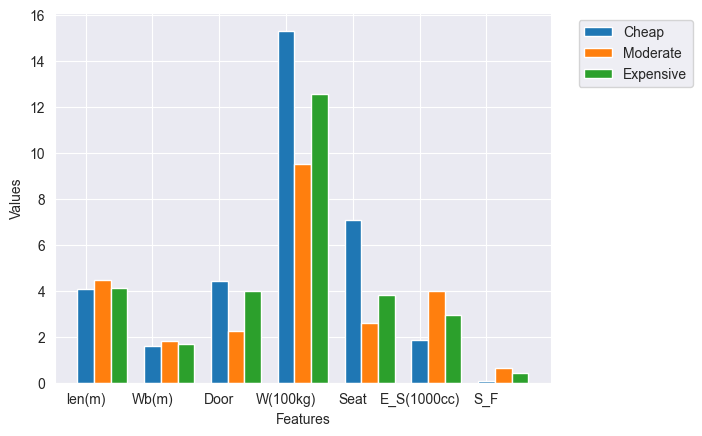

In [7]:
plt.bar(X_axis,Y_data_reshaped[0], width,label = 'Cheap')
plt.bar(X_axis+width,Y_data_reshaped[1],width,label ='Moderate')
plt.bar(X_axis+width*2,Y_data_reshaped[2],width,label ='Expensive')
plt.xticks(X_axis,column[:7])
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
labeler = LabelEncoder()

In [11]:
df['Price_encoded'] = labeler.fit_transform(df['Price'])

In [12]:
df.head()

,len(m),Wb(m),Door,W(100kg),Seat,E_S(1000cc),S_F,Price,Price_encoded
0,4.643,1.973,2,10.60,2,3.9,1,Expensive,1
1,4.672,1.932,2,10.76,2,4.0,1,Expensive,1
2,4.331,1.958,2,9.00,2,4.1,1,Expensive,1
3,4.656,1.835,2,8.49,2,3.9,1,Expensive,1
4,4.621,1.942,2,10.48,2,3.9,1,Expensive,1


In [13]:
df.tail()

,len(m),Wb(m),Door,W(100kg),Seat,E_S(1000cc),S_F,Price,Price_encoded
214,4.079,1.546,5,15.34,8,2.0,0,Cheap,0
215,4.061,1.706,5,13.84,8,1.6,0,Cheap,0
216,4.094,1.557,5,14.32,8,1.9,0,Cheap,0
217,3.657,1.421,5,15.52,8,2.4,0,Cheap,0
218,3.641,1.426,5,16.96,8,2.4,0,Cheap,0


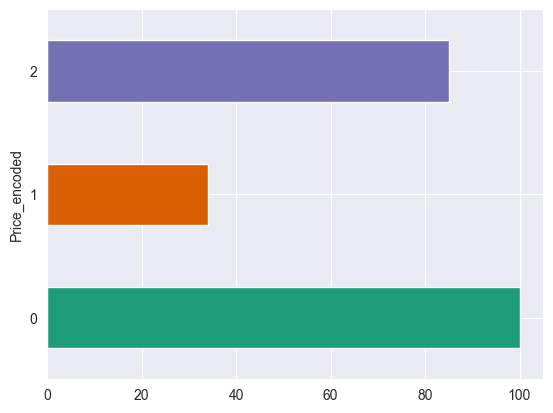

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Price_encoded').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

In [18]:
from sklearn.linear_model import LinearRegression

X = df[['len(m)']]
Y = df['Price_encoded']

In [19]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

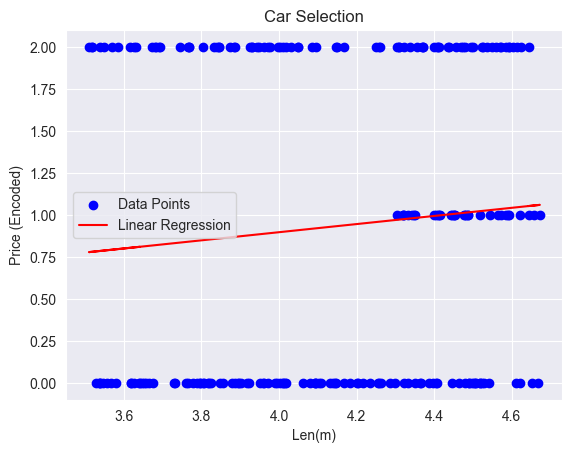

In [20]:
plt.scatter(X,Y,color = 'blue', label='Data Points')
plt.plot(X,model.predict(X), color='red', label='Linear Regression')

plt.xlabel('Len(m)')
plt.ylabel('Price (Encoded)')
plt.title('Car Selection')
plt.legend()
plt.show()

<Axes: >

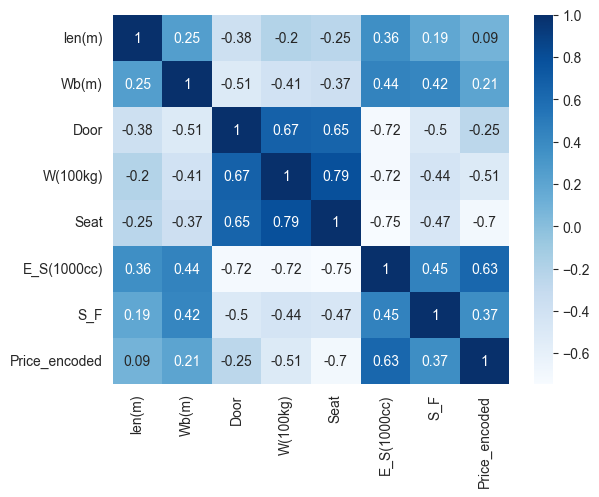

In [22]:
df2 = df.loc[:, df.columns != 'Price']
sns.heatmap(df2.corr(), cmap='Blues', annot=True)